In [1]:
from rmgpy.kinetics.uncertainties import RateUncertainty
import rmgpy
import numpy as np
from rmgpy.molecule.molecule import *
from rmgpy.species import *
from rmgpy.chemkin import *
from rmgpy.data.rmg import RMGDatabase
from IPython.display import display
from rmgpy.data.thermo import ThermoLibrary
from rmgpy.rmg.react import react
from rmgpy.species import Species
from rmgpy.reaction import Reaction
from rmgpy.data.rmg import get_db
from rmgpy.molecule.group import Group
from rmgpy.kinetics.arrhenius import ArrheniusBM, Arrhenius
from rmgpy import settings
import time
import matplotlib.pyplot as plt
import matplotlib
import rmgpy.constants as constants


In [2]:
thermo_libs = [
'PFCA_thermo',
'C1_C2_Fluorine', #adding Siddha's as first most trusted because this is the thermo library that Franklin used
'NCSU_C2_C8_PFAS', #adding Westmoreland's thermo as the second most trusted
'primaryThermoLibrary',
'Fluorine',
'FFCM1(-)',
'halogens',
'CHOF_G4',
'CHOCl_G4',
'CHOBr_G4',
'CHOFCl_G4',
'CHOFBr_G4',
'CHOFClBr_G4',
'DFT_QCI_thermo',
'2-BTP_G4',
'thermo_DFT_CCSDTF12_BAC',
'SulfurHaynes'
]

kin_families = ['Intra_R_Add_Endocyclic']


In [3]:
database = RMGDatabase()
database.load(
            path = settings['database.directory'],
            thermo_libraries = thermo_libs,
            transport_libraries = [],
            reaction_libraries = [],
            seed_mechanisms = [],#['BurkeH2O2inN2','ERC-FoundationFuelv0.9'],
            kinetics_families = kin_families,
            kinetics_depositories = ['training'],
            #frequenciesLibraries = self.statmechLibraries,
            depository = False, # Don't bother loading the depository information, as we don't use it
        )


In [4]:
database.kinetics.families

{'Intra_R_Add_Endocyclic': <ReactionFamily "Intra_R_Add_Endocyclic">}

In [5]:
# 'Intra_R_Add_Endocyclic' 
family_to_train = "Intra_R_Add_Endocyclic"
family = database.kinetics.families[family_to_train]

In [23]:
family.clean_tree()

In [24]:
start = time.time()
family.generate_tree(thermo_database=database.thermo,
                     nprocs=1,
                     new_fraction_threshold_to_reopt_node=0.25,
                     max_batch_size=800,
                     extension_iter_max=2,
                     extension_iter_item_cap=100)

end = time.time()
print(end-start)

ERROR:root:getting reaction matches
ERROR:root:building tree with 800 rxns
ERROR:root:800.0
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved terminating early
ERROR:root:Recursion item cap hit not splitting 3 reactions at iter 4 with 114 items
ERROR:root:Recursion item cap hit not splitting 2 reactions at iter 4 with 120 items
ERROR:root:iter_max achieved terminating early
ERROR:root:iter_max achieved term

389.80308771133423


In [25]:
start = time.time()
family.check_tree()
end = time.time()
print(end-start)

0.6420941352844238


In [26]:
start = time.time()
family.regularize(thermo_database=database.thermo)
end = time.time()
print(end-start)

127.92794299125671


In [7]:
start = time.time()
templateRxnMap = family.get_reaction_matches(thermo_database=database.thermo,remove_degeneracy=True,
                                             get_reverse=True,exact_matches_only=False,fix_labels=True)
end = time.time()
print(end-start)

901.4931488037109


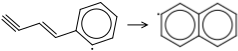

C10H7 <=> C10H7-2


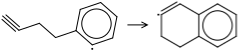

C10H9-21 <=> C10H9-22


In [36]:
#problematic node!!! Doesn't fit the two reactions well at all
rxns = templateRxnMap['Root_N-1R-inRing_N-3R->O_Ext-3CS-R_N-Sp-4R!H=3CCSS_Ext-3CS-R_Ext-5R!H-R_N-Sp-6R!H=5R!H_3CS-inRing_N-Sp-2R=1R']
rxns = np.array(rxns)
for rxn in rxns:
    display(rxn)
    print(rxn)

In [39]:
recipe = database.kinetics.families['Intra_R_Add_Endocyclic'].forward_recipe.actions

In [ ]:
#let's generate the BM fit for this specific node with 2 reactions

In [44]:
node_kin = ArrheniusBM().fit_to_reactions(rxns, recipe=recipe)
node_kin
#why is this so awful? at this specific node? n=16.45 seems too high

position 1, 0.0
position 2, 0.67
position 2, 1.365
position 3, 0.6825
position 4: 186740.40619799995
e0 and w0: None, 373.481 kJ/mol
[[    300.       -233712.156464]
 [    500.       -233712.156464]
 [    600.       -233712.156464]
 [    700.       -233712.156464]
 [    800.       -233712.156464]
 [    900.       -233712.156464]
 [   1000.       -233712.156464]
 [   1100.       -233712.156464]
 [   1200.       -233712.156464]
 [   1500.       -233712.156464]
 [   2000.       -233712.156464]
 [    300.       -175132.53312 ]
 [    500.       -175132.53312 ]
 [    600.       -175132.53312 ]
 [    700.       -175132.53312 ]
 [    800.       -175132.53312 ]
 [    900.       -175132.53312 ]
 [   1000.       -175132.53312 ]
 [   1100.       -175132.53312 ]
 [   1200.       -175132.53312 ]
 [   1500.       -175132.53312 ]
 [   2000.       -175132.53312 ]] [-67.60669293 -28.12339765 -18.21598168 -11.12322892  -5.79165904
  -1.63555252   1.69679254   4.42935778   6.71157824  11.75371469
  16.839

ArrheniusBM(A=(1.17041e-45,'s^-1'), n=16.4585, w0=(373.481,'kJ/mol'), E0=(21.3386,'kJ/mol'), Tmin=(300,'K'), Tmax=(2000,'K'), comment="""Fitted to 2 reactions at temperatures: [ 300.  500.  600.  700.  800.  900. 1000. 1100. 1200. 1500. 2000.]""")

In [ ]:
#our own mock up of the curve fit in fit_to_reactions in arrhenius.pyx

In [18]:
from scipy.optimize import curve_fit, fsolve

In [19]:
arr_rxn = Reaction(kinetics = ArrheniusBM())
arr_rxn.kinetics.w0 = (373.481, 'kJ/mol')
E0 = 186740.40619799995 #J/mol


[lnA, n, E0] = [23.325853454360452, 0.6825, 186740.40619799995]
xdata = [[    300.,       -233712.156464],
 [    500.,       -233712.156464],
 [    600.,       -233712.156464],
 [    700.,       -233712.156464],
 [    800.,       -233712.156464],
 [    900.,       -233712.156464],
 [   1000.,       -233712.156464],
 [   1100.,       -233712.156464],
 [   1200.,       -233712.156464],
 [   1500.,       -233712.156464],
 [   2000.,       -233712.156464],
 [    300.,       -175132.53312 ],
 [    500.,       -175132.53312 ],
 [    600.,       -175132.53312 ],
 [    700.,       -175132.53312 ],
 [    800.,       -175132.53312 ],
 [    900.,       -175132.53312 ],
 [   1000.,       -175132.53312 ],
 [   1100.,       -175132.53312 ],
 [   1200.,       -175132.53312 ],
 [   1500.,       -175132.53312 ],
 [   2000.,       -175132.53312 ]]

ydata = [-67.60669293, -28.12339765, -18.21598168, -11.12322892,  -5.79165904,
  -1.63555252,   1.69679254,   4.42935778,   6.71157824,  11.75371469,
  16.83909194,  13.29005745,  18.00564134,  19.22249484,  20.108301,
  20.7851089,   21.32119312,  21.75779869,  22.12135018,  22.42958218,
  23.12973696,  23.87474601]
xdata = np.array(xdata)
ydata = np.array(ydata)      
sigmas = [2.096745690325655, 1.2580474141953932, 1.0483728451628276, 0.8986052958538523, 0.7862796338721207, 0.6989152301085518, 0.6290237070976966, 0.5718397337251787, 0.5241864225814138, 0.4193491380651311, 0.3145118535488483, 2.096745690325655, 1.2580474141953932, 1.0483728451628276, 0.8986052958538523, 0.7862796338721207, 0.6989152301085518, 0.6290237070976966, 0.5718397337251787, 0.5241864225814138, 0.4193491380651311, 0.3145118535488483]

xtol = 1e-8
ftol = 1e-8

In [20]:
def kfcn(xs, lnA, n, E0):
    T = xs[:,0]
    dHrxn = xs[:,1]
    arr_rxn.kinetics.E0 = (E0, 'J/mol')
    Ea = np.array([arr_rxn.kinetics.get_activation_energy(dHrxn[i]) for i in range(len(dHrxn))])
    print(f'EA is {Ea}')
    return lnA + np.log(T)* n + (-Ea / (constants.R * T))

In [25]:
arr_rxn.kinetics.w0.value_si

373481.0

In [30]:
# starting guess
[lnA, n, E0] = [23.325853454360452, 0.6825, 186740.40619799995]

arr_rxn.kinetics.w0.value_si = 1000000
[lnA, n, E0] = [23.325853454360452, 0, 300000]

In [34]:
params = curve_fit(kfcn, xdata, ydata, sigma=sigmas, p0=[lnA, n, E0], xtol=xtol, ftol=ftol)

EA is [196531.16772543 196531.16772543 196531.16772543 196531.16772543
 196531.16772543 196531.16772543 196531.16772543 196531.16772543
 196531.16772543 196531.16772543 196531.16772543 219969.36224056
 219969.36224056 219969.36224056 219969.36224056 219969.36224056
 219969.36224056 219969.36224056 219969.36224056 219969.36224056
 219969.36224056 219969.36224056]
EA is [196531.16772543 196531.16772543 196531.16772543 196531.16772543
 196531.16772543 196531.16772543 196531.16772543 196531.16772543
 196531.16772543 196531.16772543 196531.16772543 219969.36224056
 219969.36224056 219969.36224056 219969.36224056 219969.36224056
 219969.36224056 219969.36224056 219969.36224056 219969.36224056
 219969.36224056 219969.36224056]
EA is [196531.16772543 196531.16772543 196531.16772543 196531.16772543
 196531.16772543 196531.16772543 196531.16772543 196531.16772543
 196531.16772543 196531.16772543 196531.16772543 219969.36224056
 219969.36224056 219969.36224056 219969.36224056 219969.36224056
 219

In [32]:
params

(array([-1.03458976e+02,  1.64585157e+01,  1.99634038e+04]),
 array([[inf, inf, inf],
        [inf, inf, inf],
        [inf, inf, inf]]))

In [33]:
print(f'A = {np.e**params[0][0]} s^-1, n = {params[0][1]}, E0 = {params[0][2]/1000} kJ/mol')

A = 1.1704084344365537e-45 s^-1, n = 16.458515696412967, E0 = 19.96340383520373 kJ/mol


Testing to see how two end node fits are: 

position 1, 0.0
position 2, 0.695
position 3, 0.695
position 4: 70974.94927999997
e0 and w0: None, 289.5 kJ/mol
[[    300.      -175132.53312]
 [    500.      -175132.53312]
 [    600.      -175132.53312]
 [    700.      -175132.53312]
 [    800.      -175132.53312]
 [    900.      -175132.53312]
 [   1000.      -175132.53312]
 [   1100.      -175132.53312]
 [   1200.      -175132.53312]
 [   1500.      -175132.53312]
 [   2000.      -175132.53312]] [13.29005745 18.00564134 19.22249484 20.108301   20.7851089  21.32119312
 21.75779869 22.12135018 22.42958218 23.12973696 23.87474601] [2.096745690325655, 1.2580474141953932, 1.0483728451628276, 0.8986052958538523, 0.7862796338721207, 0.6989152301085518, 0.6290237070976966, 0.5718397337251787, 0.5241864225814138, 0.4193491380651311, 0.3145118535488483] [20.22732882567417, 0.695, 70974.94927999997]
EA is [13422.47859948 13422.47859948 13422.47859948 13422.47859948
 13422.47859948 13422.47859948 13422.47859948 13422.47859948
 13422.47859948 1

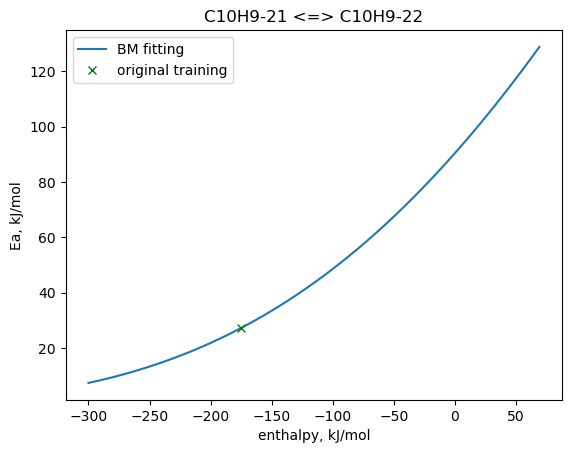

In [41]:
%matplotlib inline

#node 1 = C10H9-21 <=> C10H9-22
child_node_1 = "Root_N-1R-inRing_N-3R->O_Ext-3CS-R_N-Sp-4R!H=3CCSS_Ext-3CS-R_Ext-5R!H-R_N-Sp-6R!H=5R!H_3CS-inRing_N-Sp-2R=1R_Ext-6R!H-R_Sp-7R!H-6R!H"
rxns_test = templateRxnMap[child_node_1]
rxns_test = np.array(rxns_test)

dH_range = range(-300, 70) #in kJ/mol

C10H9_21_Ea_from_BM = []

for i, rxn in enumerate(rxns_test):
    
    BM_fit = ArrheniusBM().fit_to_reactions([rxn], recipe=recipe)
    print(f'BM fit: {BM_fit}\n')
    print(f'BM fit .to_arrhenius: {BM_fit.to_arrhenius(rxn.get_enthalpy_of_reaction(298))}\n')
    print(f'original kinetics from training rxn: {rxn.kinetics}\n')
    print('\n')

    if 'C10H9-21' in str(rxn): 
        for dH in dH_range:
            dH_Joules_per_mole = dH * 1000
            Ea_from_BM = BM_fit.to_arrhenius(dH_Joules_per_mole).Ea.value #Ea returned in KJ/mol
            C10H9_21_Ea_from_BM.append(Ea_from_BM)
        actual_Ea_from_training = rxn.kinetics.Ea.value_si #J/mol
        C10H9_21_actual_Ea_from_training_kJ_per_mole = actual_Ea_from_training/1000 #kJ/mol
        actual_enthalpy_for_training_reactions = rxn.get_enthalpy_of_reaction(298) #in J/mol
        C10H9_21_actual_enthalpy_for_training_reactions_kJ_per_mol = actual_enthalpy_for_training_reactions/1000 #kJ/mol
        plt.figure()
        plt.plot(list(dH_range), C10H9_21_Ea_from_BM, label = 'BM fitting')    
        plt.plot(C10H9_21_actual_enthalpy_for_training_reactions_kJ_per_mol, C10H9_21_actual_Ea_from_training_kJ_per_mole, 'x', c= 'green', label = 'original training')
        plt.title('C10H9-21 <=> C10H9-22')
        plt.xlabel('enthalpy, kJ/mol')
        plt.ylabel('Ea, kJ/mol')
        plt.legend()
        plt.show()
        
            
        
#FROM _make_rule(rr) in FAMILY.PY
# dlnks = np.array([
#                 np.log(
#                     ArrheniusBM().fit_to_reactions(rxns[list(set(range(len(rxns))) - {i})], recipe=recipe)
#                     .to_arrhenius(rxn.get_enthalpy_of_reaction(Tref))
#                     .get_rate_coefficient(T=Tref) / rxn.get_rate_coefficient(T=Tref)
#                 ) for i, rxn in enumerate(rxns)

C10H7 <=> C10H7-2
position 1, 0.0
position 2, 0.67
position 3, 0.67
position 4: 302505.86311599996
e0 and w0: None, 605.012 kJ/mol
[[    300.       -233712.156464]
 [    500.       -233712.156464]
 [    600.       -233712.156464]
 [    700.       -233712.156464]
 [    800.       -233712.156464]
 [    900.       -233712.156464]
 [   1000.       -233712.156464]
 [   1100.       -233712.156464]
 [   1200.       -233712.156464]
 [   1500.       -233712.156464]
 [   2000.       -233712.156464]] [-67.60669293 -28.12339765 -18.21598168 -11.12322892  -5.79165904
  -1.63555252   1.69679254   4.42935778   6.71157824  11.75371469
  16.83909194] [2.096745690325655, 1.2580474141953932, 1.0483728451628276, 0.8986052958538523, 0.7862796338721207, 0.6989152301085518, 0.6290237070976966, 0.5718397337251787, 0.5241864225814138, 0.4193491380651311, 0.3145118535488483] [26.424378083046733, 0.67, 302505.86311599996]
EA is [198286.69362827 198286.69362827 198286.69362827 198286.69362827
 198286.69362827 198

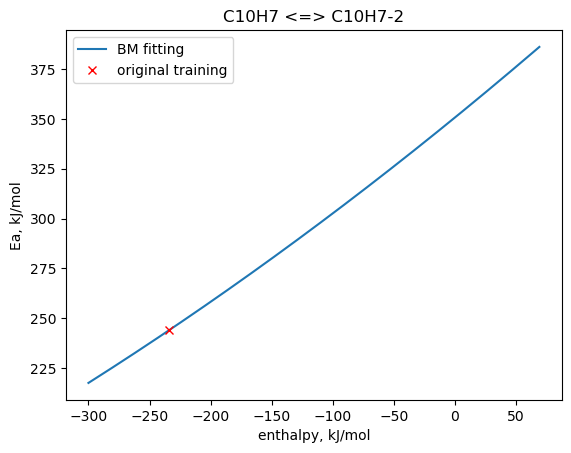

In [42]:
%matplotlib inline

#node 2 = C10H7 <=> C10H7-2
child_node_2 = "Root_N-1R-inRing_N-3R->O_Ext-3CS-R_N-Sp-4R!H=3CCSS_Ext-3CS-R_Ext-5R!H-R_N-Sp-6R!H=5R!H_3CS-inRing_N-Sp-2R=1R_Ext-6R!H-R_N-Sp-7R!H-6R!H"

rxns_test = templateRxnMap[child_node_2]
rxns_test = np.array(rxns_test)
for rxn in rxns_test:
    print(rxn)

dH_range = range(-300, 70) #in kJ/mol

C10H7_Ea_from_BM = []

for i, rxn in enumerate(rxns_test):
    
    BM_fit = ArrheniusBM().fit_to_reactions([rxn], recipe=recipe)
    print(f'BM fit: {BM_fit}\n')
    print(f'BM fit .to_arrhenius: {BM_fit.to_arrhenius(rxn.get_enthalpy_of_reaction(298))}\n')
    print(f'original kinetics from training rxn: {rxn.kinetics}\n')
    print('\n')

    if 'C10H7' in str(rxn): 
        for dH in dH_range:
            dH_Joules_per_mole = dH * 1000
            Ea_from_BM = BM_fit.to_arrhenius(dH_Joules_per_mole).Ea.value #Ea returned in KJ/mol
            C10H7_Ea_from_BM.append(Ea_from_BM)
        actual_Ea_from_training = rxn.kinetics.Ea.value_si #J/mol
        C10H7_actual_Ea_from_training_kJ_per_mole = actual_Ea_from_training/1000 #kJ/mol
        actual_enthalpy_for_training_reactions = rxn.get_enthalpy_of_reaction(298) #in J/mol
        C10H7_actual_enthalpy_for_training_reactions_kJ_per_mol = actual_enthalpy_for_training_reactions/1000 #kJ/mol
        plt.figure()
        plt.plot(list(dH_range), C10H7_Ea_from_BM, label = 'BM fitting')    
        plt.plot(C10H7_actual_enthalpy_for_training_reactions_kJ_per_mol, C10H7_actual_Ea_from_training_kJ_per_mole, 'x', c= 'red', label = 'original training')
        plt.title('C10H7 <=> C10H7-2')
        plt.xlabel('enthalpy, kJ/mol')
        plt.ylabel('Ea, kJ/mol')
        plt.legend()
        plt.show()
        
            
        
#FROM _make_rule(rr) in FAMILY.PY
# dlnks = np.array([
#                 np.log(
#                     ArrheniusBM().fit_to_reactions(rxns[list(set(range(len(rxns))) - {i})], recipe=recipe)
#                     .to_arrhenius(rxn.get_enthalpy_of_reaction(Tref))
#                     .get_rate_coefficient(T=Tref) / rxn.get_rate_coefficient(T=Tref)
#                 ) for i, rxn in enumerate(rxns)

OVERALL KINETICS AT ONE NODE UP

In [13]:
rxns = templateRxnMap['Root_N-1R-inRing_N-3R->O_Ext-3CS-R_N-Sp-4R!H=3CCSS_Ext-3CS-R_Ext-5R!H-R_N-Sp-6R!H=5R!H_3CS-inRing_N-Sp-2R=1R'] #combination node
rxns = np.array(rxns)
for rxn in rxns:
    print(rxn)

C10H7 <=> C10H7-2
C10H9-21 <=> C10H9-22


BM kinetics at problematic node: ArrheniusBM(A=(1.17041e-45,'s^-1'), n=16.4585, w0=(373.481,'kJ/mol'), E0=(21.3386,'kJ/mol'), Tmin=(300,'K'), Tmax=(2000,'K'), uncertainty=RateUncertainty(mu=-0.6556630290002998, var=989.4692832853647, Tref=1000.0, N=2, data_mean=0.0, correlation='Root_N-1R-inRing_N-3R->O_Ext-3CS-R_N-Sp-4R!H=3CCSS_Ext-3CS-R_Ext-5R!H-R_N-Sp-6R!H=5R!H_3CS-inRing_N-Sp-2R=1R',))




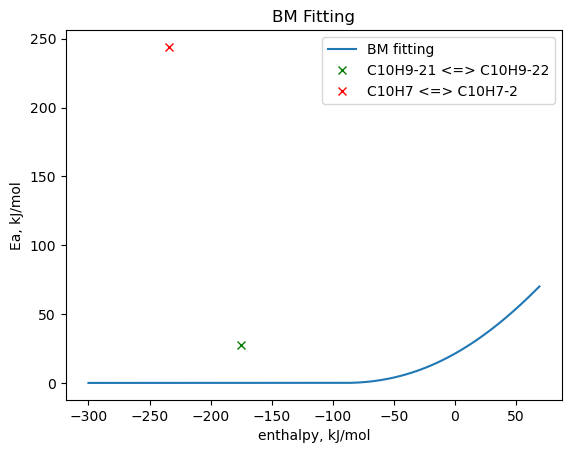

In [44]:
#overall kinetics at that node problematic node

node_BM_kinetics = ArrheniusBM(A=(1.17041e-45,'s^-1'), n=16.4585, w0=(373.481,'kJ/mol'), E0=(21.3386,'kJ/mol'), Tmin=(300,'K'), Tmax=(2000,'K'), uncertainty=RateUncertainty(mu=-0.6556630290002998, var=989.4692832853647, Tref=1000.0, N=2, data_mean=0.0, correlation='Root_N-1R-inRing_N-3R->O_Ext-3CS-R_N-Sp-4R!H=3CCSS_Ext-3CS-R_Ext-5R!H-R_N-Sp-6R!H=5R!H_3CS-inRing_N-Sp-2R=1R',))
BM_node_reaction = Reaction(kinetics = node_BM_kinetics)
     
print(f'BM kinetics at problematic node: {node_BM_kinetics}')
print('\n')
%matplotlib inline
dH_range = range(-300, 70) #in kJ/mol

BM_Ea_in_kJ_per_mole = []

for dH in dH_range:
    dH_Joules_per_mole = dH * 1000
    Ea_from_BM = BM_node_reaction.kinetics.to_arrhenius(dH_Joules_per_mole).Ea.value #Ea returned in KJ/mol
    #print(BM_node_reaction.kinetics.to_arrhenius(dH_Joules_per_mole).Ea)
    BM_Ea_in_kJ_per_mole.append(Ea_from_BM)

for i, rxn in enumerate(rxns):
    
    
    if 'C10H7' in str(rxn):
        actual_Ea_from_training = rxn.kinetics.Ea.value_si #J/mol
        C10H7_actual_Ea_from_training_kJ_per_mole = actual_Ea_from_training/1000 #kJ/mol
        actual_enthalpy_for_training_reactions = rxn.get_enthalpy_of_reaction(298) #in J/mol
        C10H7_actual_enthalpy_for_training_reactions_kJ_per_mol = actual_enthalpy_for_training_reactions/1000 #kJ/mol

            
    if 'C10H9-21' in str(rxn): 
        actual_Ea_from_training = rxn.kinetics.Ea.value_si #J/mol
        C10H9_21_actual_Ea_from_training_kJ_per_mole = actual_Ea_from_training/1000 #kJ/mol
        actual_enthalpy_for_training_reactions = rxn.get_enthalpy_of_reaction(298) #in J/mol
        C10H9_21_actual_enthalpy_for_training_reactions_kJ_per_mol = actual_enthalpy_for_training_reactions/1000 #kJ/mol

        
plt.figure()
plt.plot(list(dH_range), BM_Ea_in_kJ_per_mole, label = 'BM fitting')    
plt.plot(C10H9_21_actual_enthalpy_for_training_reactions_kJ_per_mol, C10H9_21_actual_Ea_from_training_kJ_per_mole, 'x', c= 'green', label = 'C10H9-21 <=> C10H9-22')
plt.plot(C10H7_actual_enthalpy_for_training_reactions_kJ_per_mol, C10H7_actual_Ea_from_training_kJ_per_mole, 'x', c= 'red', label = 'C10H7 <=> C10H7-2')
plt.title('BM Fitting')
plt.xlabel('enthalpy, kJ/mol')
plt.ylabel('Ea, kJ/mol')
plt.legend()
plt.show()
        
            
        
# FROM _make_rule(rr) in FAMILY.PY
# dlnks = np.array([
#                 np.log(
#                     ArrheniusBM().fit_to_reactions(rxns[list(set(range(len(rxns))) - {i})], recipe=recipe)
#                     .to_arrhenius(rxn.get_enthalpy_of_reaction(Tref))
#                     .get_rate_coefficient(T=Tref) / rxn.get_rate_coefficient(T=Tref)
#                 ) for i, rxn in enumerate(rxns)


In [11]:
#overall kinetics at that node problematic node
#Arrhenius plot

#manual loading in of parent node
label = "Root_N-1R-inRing_N-3R->O_Ext-3CS-R_N-Sp-4R!H=3CCSS_Ext-3CS-R_Ext-5R!H-R_N-Sp-6R!H=5R!H_3CS-inRing_N-Sp-2R=1R"
node_BM_kinetics = ArrheniusBM(A=(1.17041e-45,'s^-1'), n=16.4585, w0=(373.481,'kJ/mol'), E0=(21.3386,'kJ/mol'), Tmin=(300,'K'), Tmax=(2000,'K'), uncertainty=RateUncertainty(mu=-0.6556630290002998, var=989.4692832853647, Tref=1000.0, N=2, data_mean=0.0, correlation='Root_N-1R-inRing_N-3R->O_Ext-3CS-R_N-Sp-4R!H=3CCSS_Ext-3CS-R_Ext-5R!H-R_N-Sp-6R!H=5R!H_3CS-inRing_N-Sp-2R=1R',))
BM_node_reaction = Reaction(kinetics = node_BM_kinetics)    


In [8]:
#manual loading in of child nodes 

#index 352
#'C10H9-21'
label = "Root_N-1R-inRing_N-3R->O_Ext-3CS-R_N-Sp-4R!H=3CCSS_Ext-3CS-R_Ext-5R!H-R_N-Sp-6R!H=5R!H_3CS-inRing_N-Sp-2R=1R_Ext-6R!H-R_Sp-7R!H-6R!H"
child_node_kin_1 = ArrheniusBM(A=(6.09e+08,'s^-1'),
                               n=0.695, 
                               w0=(289.5,'kJ/mol'), 
                               E0=(90.5131,'kJ/mol'), 
                               Tmin=(300,'K'), 
                               Tmax=(2000,'K'), 
                               uncertainty = RateUncertainty(mu=0.0, var=33.13686319048999, Tref=1000.0, N=1, data_mean=0.0, correlation='Root_N-1R-inRing_N-3R->O_Ext-3CS-R_N-Sp-4R!H=3CCSS_Ext-3CS-R_Ext-5R!H-R_N-Sp-6R!H=5R!H_3CS-inRing_N-Sp-2R=1R_Ext-6R!H-R_Sp-7R!H-6R!H',),
                               comment="""BM rule fitted to 1 training reactions at node Root_N-1R-inRing_N-3R->O_Ext-3CS-R_N-Sp-4R!H=3CCSS_Ext-3CS-R_Ext-5R!H-R_N-Sp-6R!H=5R!H_3CS-inRing_N-Sp-2R=1R_Ext-6R!H-R_Sp-7R!H-6R!H Total Standard Deviation in ln(k): 11.540182761524994""")

reacts = templateRxnMap[label][0].reactants
prods = templateRxnMap[label][0].products

child_node_rxn_1 = Reaction(reactants = reacts, products = prods, kinetics = child_node_kin_1)


print(f'BM node kinetics: {child_node_rxn_1.kinetics}', '\n\n', f'Training rxn: {templateRxnMap[label][0].kinetics}', '\n')
print('node rate, training reaction rate:')
print(child_node_rxn_1.get_rate_coefficient(1000), templateRxnMap[label][0].kinetics.get_rate_coefficient(1000))

BM node kinetics: ArrheniusBM(A=(6.09e+08,'s^-1'), n=0.695, w0=(289.5,'kJ/mol'), E0=(90.5131,'kJ/mol'), Tmin=(300,'K'), Tmax=(2000,'K'), uncertainty=RateUncertainty(mu=0.0, var=33.13686319048999, Tref=1000.0, N=1, data_mean=0.0, correlation='Root_N-1R-inRing_N-3R->O_Ext-3CS-R_N-Sp-4R!H=3CCSS_Ext-3CS-R_Ext-5R!H-R_N-Sp-6R!H=5R!H_3CS-inRing_N-Sp-2R=1R_Ext-6R!H-R_Sp-7R!H-6R!H',), comment="""BM rule fitted to 1 training reactions at node Root_N-1R-inRing_N-3R->O_Ext-3CS-R_N-Sp-4R!H=3CCSS_Ext-3CS-R_Ext-5R!H-R_N-Sp-6R!H=5R!H_3CS-inRing_N-Sp-2R=1R_Ext-6R!H-R_Sp-7R!H-6R!H Total Standard Deviation in ln(k): 11.540182761524994""") 

 Training rxn: Arrhenius(A=(6.09e+08,'s^-1'), n=0.695, Ea=(6.499,'kcal/mol'), T0=(1,'K')) 

node rate, training reaction rate:
1386103.7742112791 2813791464.9613085


In [9]:
                        
#index 352
#C10H7
label = "Root_N-1R-inRing_N-3R->O_Ext-3CS-R_N-Sp-4R!H=3CCSS_Ext-3CS-R_Ext-5R!H-R_N-Sp-6R!H=5R!H_3CS-inRing_N-Sp-2R=1R_Ext-6R!H-R_N-Sp-7R!H-6R!H"

child_node_kin_2 = ArrheniusBM(A=(2.992e+11,'s^-1'), n=0.67, w0=(605.012,'kJ/mol'), E0=(350.755,'kJ/mol'), Tmin=(300,'K'), Tmax=(2000,'K'), uncertainty=RateUncertainty(mu=0.0, var=33.13686319048999, Tref=1000.0, N=1, data_mean=0.0, correlation='Root_N-1R-inRing_N-3R->O_Ext-3CS-R_N-Sp-4R!H=3CCSS_Ext-3CS-R_Ext-5R!H-R_N-Sp-6R!H=5R!H_3CS-inRing_N-Sp-2R=1R_Ext-6R!H-R_N-Sp-7R!H-6R!H',), comment="""BM rule fitted to 1 training reactions at node Root_N-1R-inRing_N-3R->O_Ext-3CS-R_N-Sp-4R!H=3CCSS_Ext-3CS-R_Ext-5R!H-R_N-Sp-6R!H=5R!H_3CS-inRing_N-Sp-2R=1R_Ext-6R!H-R_N-Sp-7R!H-6R!H Total Standard Deviation in ln(k): 11.540182761524994""")
child_node_rxn_2 = Reaction(kinetics = child_node_kin_2)

reacts = templateRxnMap[label][0].reactants
prods = templateRxnMap[label][0].products

child_node_rxn_2 = Reaction(reactants = reacts, products = prods, kinetics = child_node_kin_2)

print(f'BM node kinetics: {child_node_rxn_2.kinetics}', '\n\n', f'Training rxn: {templateRxnMap[label][0].kinetics}', '\n')
print('node rate, training reaction rate:')
print(child_node_rxn_2.get_rate_coefficient(1000), templateRxnMap[label][0].kinetics.get_rate_coefficient(1000))

BM node kinetics: ArrheniusBM(A=(2.992e+11,'s^-1'), n=0.67, w0=(605.012,'kJ/mol'), E0=(350.755,'kJ/mol'), Tmin=(300,'K'), Tmax=(2000,'K'), uncertainty=RateUncertainty(mu=0.0, var=33.13686319048999, Tref=1000.0, N=1, data_mean=0.0, correlation='Root_N-1R-inRing_N-3R->O_Ext-3CS-R_N-Sp-4R!H=3CCSS_Ext-3CS-R_Ext-5R!H-R_N-Sp-6R!H=5R!H_3CS-inRing_N-Sp-2R=1R_Ext-6R!H-R_N-Sp-7R!H-6R!H',), comment="""BM rule fitted to 1 training reactions at node Root_N-1R-inRing_N-3R->O_Ext-3CS-R_N-Sp-4R!H=3CCSS_Ext-3CS-R_Ext-5R!H-R_N-Sp-6R!H=5R!H_3CS-inRing_N-Sp-2R=1R_Ext-6R!H-R_N-Sp-7R!H-6R!H Total Standard Deviation in ln(k): 11.540182761524994""") 

 Training rxn: Arrhenius(A=(2.992e+11,'s^-1'), n=0.67, Ea=(58.336,'kcal/mol'), T0=(1,'K')) 

node rate, training reaction rate:
1.4614327552299956e-05 5.456418041763483


BM kinetics at problematic node: ArrheniusBM(A=(1.17041e-45,'s^-1'), n=16.4585, w0=(373.481,'kJ/mol'), E0=(21.3386,'kJ/mol'), Tmin=(300,'K'), Tmax=(2000,'K'), uncertainty=RateUncertainty(mu=-0.6556630290002998, var=989.4692832853647, Tref=1000.0, N=2, data_mean=0.0, correlation='Root_N-1R-inRing_N-3R->O_Ext-3CS-R_N-Sp-4R!H=3CCSS_Ext-3CS-R_Ext-5R!H-R_N-Sp-6R!H=5R!H_3CS-inRing_N-Sp-2R=1R',))




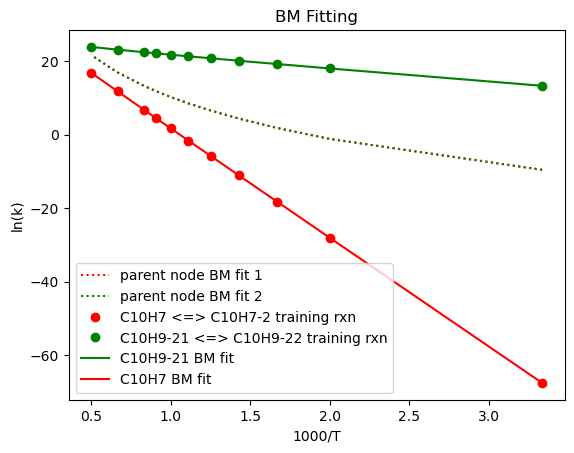

In [15]:
print(f'BM kinetics at problematic node: {node_BM_kinetics}')
print('\n')
%matplotlib inline
temperatures = [ 300., 500.,  600.,  700. , 800.,  900., 1000., 1100., 1200., 1500., 2000.]

node_rate_coefficients_1 = []
node_rate_coefficients_2 = []

child_node_1_rate_coefficients = []
child_node_2_rate_coefficients = []

for temp in temperatures:


    dHrxn = child_node_rxn_1.get_enthalpy_of_reaction(298)
    rate = child_node_rxn_1.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn) #loaded in as BM kinetics 
    child_node_1_rate_coefficients.append(rate)
    
    rate = BM_node_reaction.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn)
    node_rate_coefficients_1.append(rate)
    
    dHrxn = child_node_rxn_2.get_enthalpy_of_reaction(298)
    rate = child_node_rxn_2.kinetics.get_rate_coefficient(temp,  dHrxn=dHrxn) #loaded in as BM kinetics
    child_node_2_rate_coefficients.append(rate) 
    
    rate = BM_node_reaction.kinetics.get_rate_coefficient(temp, dHrxn=dHrxn)
    node_rate_coefficients_2.append(rate)
    
    
    
C10H7_rates= []
C10H9_21_rates = []
    
for i, rxn in enumerate(rxns): #both reactions at the node
    
    
    if 'C10H7' in str(rxn):
        for temp in temperatures: 
            C10H7_actual_k_from_training = rxn.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as training rxn from templateRxnMap
            C10H7_rates.append(C10H7_actual_k_from_training)
            
    if 'C10H9-21' in str(rxn): 
        for temp in temperatures:
            C10H9_21_actual_k_from_training = rxn.kinetics.get_rate_coefficient(temp) #J/mol #loaded in as training rxn from templateRxnMap
            C10H9_21_rates.append(C10H9_21_actual_k_from_training)
        
        
#get lnks and 1000/T
inverse_temps = [1000/T for T in temperatures]
lnks_node_1 = [np.log(rate) for rate in node_rate_coefficients_1]
lnks_node_2 = [np.log(rate) for rate in node_rate_coefficients_2]

lnks_C10H7 = [np.log(rate) for rate in C10H7_rates]
lnks_C10H9_21 = [np.log(rate) for rate in C10H9_21_rates]


        
plt.figure()
plt.plot(inverse_temps, lnks_node_1, ':r', label = 'parent node BM fit 1')   
plt.plot(inverse_temps, lnks_node_2, ':g', label = 'parent node BM fit 2')    
plt.plot(inverse_temps, lnks_C10H7, 'o', c= 'red', label = 'C10H7 <=> C10H7-2 training rxn')
plt.plot(inverse_temps, lnks_C10H9_21, 'o', c= 'green', label = 'C10H9-21 <=> C10H9-22 training rxn')

plt.plot(inverse_temps, [np.log(rate) for rate in child_node_1_rate_coefficients], '-', c='g', label='C10H9-21 BM fit')
plt.plot(inverse_temps, [np.log(rate) for rate in child_node_2_rate_coefficients], '-', c='r', label='C10H7 BM fit')


plt.title('BM Fitting')
plt.xlabel('1000/T')
plt.ylabel('ln(k)')
plt.legend()
plt.show()

BM fit: ArrheniusBM(A=(6.09e+08,'s^-1'), n=0.695, w0=(289.5,'kJ/mol'), E0=(90.5131,'kJ/mol'), Tmin=(300,'K'), Tmax=(2000,'K'), comment="""Fitted to 1 reactions at temperatures: [ 300.  500.  600.  700.  800.  900. 1000. 1100. 1200. 1500. 2000.]""")

BM fit .to_arrhenius: Arrhenius(A=(6.09e+08,'s^-1'), n=0.695, Ea=(14.5042,'kJ/mol'), T0=(1,'K'), Tmin=(300,'K'), Tmax=(2000,'K'), comment="""Fitted to 1 reactions at temperatures: [ 300.  500.  600.  700.  800.  900. 1000. 1100. 1200. 1500. 2000.]""")

original kinetics from training rxn: Arrhenius(A=(6.09e+08,'s^-1'), n=0.695, Ea=(6.499,'kcal/mol'), T0=(1,'K'))





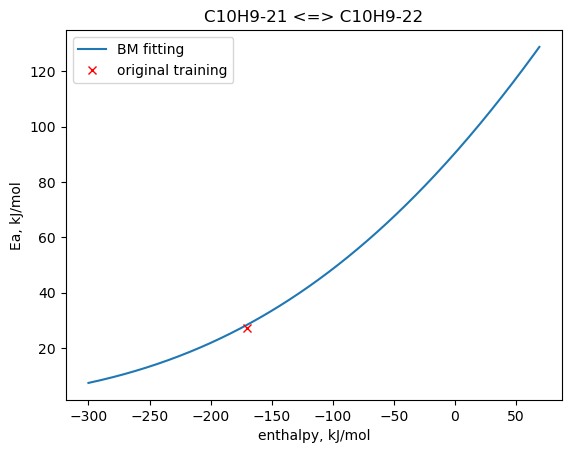

BM fit: ArrheniusBM(A=(2.992e+11,'s^-1'), n=0.67, w0=(605.012,'kJ/mol'), E0=(350.755,'kJ/mol'), Tmin=(300,'K'), Tmax=(2000,'K'), comment="""Fitted to 1 reactions at temperatures: [ 300.  500.  600.  700.  800.  900. 1000. 1100. 1200. 1500. 2000.]""")

BM fit .to_arrhenius: Arrhenius(A=(2.992e+11,'s^-1'), n=0.67, Ea=(267.668,'kJ/mol'), T0=(1,'K'), Tmin=(300,'K'), Tmax=(2000,'K'), comment="""Fitted to 1 reactions at temperatures: [ 300.  500.  600.  700.  800.  900. 1000. 1100. 1200. 1500. 2000.]""")

original kinetics from training rxn: Arrhenius(A=(2.992e+11,'s^-1'), n=0.67, Ea=(58.336,'kcal/mol'), T0=(1,'K'))





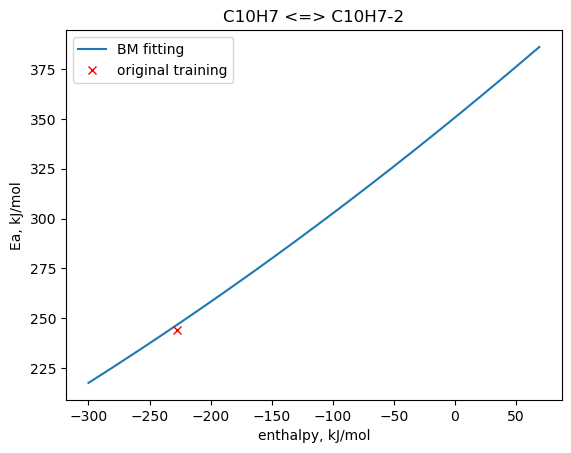

In [25]:
%matplotlib inline
dH_range = range(-300, 70) #in kJ/mol

C10H7_Ea_from_BM = []
C10H9_21_Ea_from_BM = []

for i, rxn in enumerate(rxns):
    
    training_rxn = rxns[list(set(range(len(rxns))) - {i})][0]
    BM_fit = ArrheniusBM().fit_to_reactions(rxns[list(set(range(len(rxns))) - {i})], recipe=recipe)
    print(f'BM fit: {BM_fit}\n')
    print(f'BM fit .to_arrhenius: {BM_fit.to_arrhenius(rxn.get_enthalpy_of_reaction(1000))}\n')
    print(f'original kinetics from training rxn: {training_rxn.kinetics}\n')
    print('\n')
    
    if 'C10H7' in str(training_rxn):
        for dH in dH_range:
            dH_Joules_per_mole = dH * 1000
            Ea_from_BM = BM_fit.to_arrhenius(dH_Joules_per_mole).Ea.value #Ea returned in KJ/mol
            C10H7_Ea_from_BM.append(Ea_from_BM)
        actual_Ea_from_training = training_rxn.kinetics.Ea.value_si #J/mol
        C10H7_actual_Ea_from_training_kJ_per_mole = actual_Ea_from_training/1000 #kJ/mol
        actual_enthalpy_for_training_reactions = training_rxn.get_enthalpy_of_reaction(training_rxn.kinetics.T0.value) #in J/mol
        C10H7_actual_enthalpy_for_training_reactions_kJ_per_mol = actual_enthalpy_for_training_reactions/1000 #kJ/mol
        plt.figure()
        plt.plot(list(dH_range), C10H7_Ea_from_BM, label = 'BM fitting')
        plt.plot(C10H7_actual_enthalpy_for_training_reactions_kJ_per_mol, C10H7_actual_Ea_from_training_kJ_per_mole, 'x',  c= 'red',label = 'original training')
        plt.title('C10H7 <=> C10H7-2')
        plt.xlabel('enthalpy, kJ/mol')
        plt.ylabel('Ea, kJ/mol')
        plt.legend()
        plt.show()

            
    if 'C10H9-21' in str(training_rxn): 
        for dH in dH_range:
            dH_Joules_per_mole = dH * 1000
            Ea_from_BM = BM_fit.to_arrhenius(dH_Joules_per_mole).Ea.value #Ea returned in KJ/mol
            C10H9_21_Ea_from_BM.append(Ea_from_BM)
        actual_Ea_from_training = training_rxn.kinetics.Ea.value_si #J/mol
        C10H9_21_actual_Ea_from_training_kJ_per_mole = actual_Ea_from_training/1000 #kJ/mol
        actual_enthalpy_for_training_reactions = training_rxn.get_enthalpy_of_reaction(training_rxn.kinetics.T0.value) #in J/mol
        C10H9_21_actual_enthalpy_for_training_reactions_kJ_per_mol = actual_enthalpy_for_training_reactions/1000 #kJ/mol
        plt.figure()
        plt.plot(list(dH_range), C10H9_21_Ea_from_BM, label = 'BM fitting')    
        plt.plot(C10H9_21_actual_enthalpy_for_training_reactions_kJ_per_mol, C10H9_21_actual_Ea_from_training_kJ_per_mole, 'x', c= 'red', label = 'original training')
        plt.title('C10H9-21 <=> C10H9-22')
        plt.xlabel('enthalpy, kJ/mol')
        plt.ylabel('Ea, kJ/mol')
        plt.legend()
        plt.show()
        
            
        
#FROM _make_rule(rr) in FAMILY.PY
# dlnks = np.array([
#                 np.log(
#                     ArrheniusBM().fit_to_reactions(rxns[list(set(range(len(rxns))) - {i})], recipe=recipe)
#                     .to_arrhenius(rxn.get_enthalpy_of_reaction(Tref))
#                     .get_rate_coefficient(T=Tref) / rxn.get_rate_coefficient(T=Tref)
#                 ) for i, rxn in enumerate(rxns)

In [101]:
entry, train_rxn = family.retrieve_original_entry(label)

AttributeError: 'NoneType' object has no attribute 'kinetics'

In [105]:
entry.data

ArrheniusBM(A=(1.17041e-45,'s^-1'), n=16.4585, w0=(373.481,'kJ/mol'), E0=(21.3386,'kJ/mol'), Tmin=(300,'K'), Tmax=(2000,'K'), uncertainty=RateUncertainty(mu=-0.6556630290002998, var=989.4692832853647, Tref=1000.0, N=2, data_mean=0.0, correlation='Root_N-1R-inRing_N-3R->O_Ext-3CS-R_N-Sp-4R!H=3CCSS_Ext-3CS-R_Ext-5R!H-R_N-Sp-6R!H=5R!H_3CS-inRing_N-Sp-2R=1R',), comment="""BM rule fitted to 2 training reactions at node Root_N-1R-inRing_N-3R->O_Ext-3CS-R_N-Sp-4R!H=3CCSS_Ext-3CS-R_Ext-5R!H-R_N-Sp-6R!H=5R!H_3CS-inRing_N-Sp-2R=1R
    Total Standard Deviation in ln(k): 64.70800168258745""")

In [104]:
dir(entry)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slotnames__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'binding_energies',
 'children',
 'data',
 'data_count',
 'facet',
 'get_all_descendants',
 'index',
 'item',
 'label',
 'long_desc',
 'metal',
 'nodal_distance',
 'parent',
 'rank',
 'reference',
 'reference_type',
 'short_desc',
 'site',
 'surface_site_density']

Do all the nodes fit like this? Let's compare in the nodes where number of reactions is 1

In [94]:
n_1_mapping = [key for key, value in templateRxnMap.items() if len(value)==1]

In [95]:
for key in n_1_mapping: 
    training_rxn = 

['Root_1R-inRing_2R->C_Int-3R-1R_Sp-2C-=1R',
 'Root_1R-inRing_2R->C_Int-3R-1R_N-Sp-2C-=1R_Ext-3R-R_Ext-4R!H-R_Ext-4R!H-R_Ext-1R-R',
 'Root_1R-inRing_2R->C_Ext-3R-R_Ext-1R-R_Ext-3R-R_Int-5R!H-4R!H_Sp-5R!H=4R!H_2C-inRing_Ext-2C-R_Int-6R!H-3R_Ext-6R!H-R_Sp-7R!H-6R!H_7R!H-inRing_Ext-2C-R',
 'Root_1R-inRing_2R->C_Ext-3R-R_Ext-1R-R_Ext-3R-R_Int-5R!H-4R!H_Sp-5R!H=4R!H_2C-inRing_Ext-2C-R_Int-6R!H-3R_Ext-6R!H-R_Sp-7R!H-6R!H_N-7R!H-inRing_Ext-7R!H-R',
 'Root_1R-inRing_2R->C_Ext-3R-R_Ext-1R-R_Ext-3R-R_Int-5R!H-4R!H_Sp-5R!H=4R!H_2C-inRing_Ext-2C-R_Int-6R!H-3R_Ext-6R!H-R_N-Sp-7R!H-6R!H',
 'Root_1R-inRing_2R->C_Ext-3R-R_Ext-1R-R_Ext-3R-R_Int-5R!H-4R!H_Sp-5R!H=4R!H_2C-inRing_Ext-2C-R_Int-6R!H-3R_Ext-2C-R',
 'Root_1R-inRing_2R->C_Ext-3R-R_Ext-1R-R_Ext-3R-R_Int-5R!H-4R!H_Sp-5R!H=4R!H_2C-inRing_Ext-2C-R_Ext-6R!H-R_Ext-7R!H-R_Sp-8R!H=7R!H_Ext-3R-R',
 'Root_1R-inRing_2R->C_Ext-3R-R_Ext-1R-R_Ext-3R-R_Int-5R!H-4R!H_Sp-5R!H=4R!H_2C-inRing_Ext-2C-R_Ext-6R!H-R_Ext-7R!H-R_N-Sp-8R!H=7R!H_Ext-1R-R_Ext-3R-R',
 'Ro